In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Load data

df = pd.read_csv('AB_NYC_2019.csv', index_col='id')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [122]:
# Add a couple features

# Dummy variables for each borough

df = pd.concat([df, pd.get_dummies(df['neighbourhood_group'])], axis=1)

# Dummy variables for each room type

df = pd.concat([df, pd.get_dummies(df['room_type'])], axis=1)

In [123]:
# Create subset of dataframe containing only numeric variables

numeric = df.select_dtypes(include=np.number).reset_index()
numeric.drop(['host_id', 'id', 'reviews_per_month', 'calculated_host_listings_count',
             'latitude', 'longitude'], axis=1, inplace=True)

In [124]:
# Get correlations

corr = numeric.corr()
corr

,price,minimum_nights,number_of_reviews,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
price,1.000000,0.042799,-0.047954,0.081829,-0.041030,-0.098603,0.163976,-0.080205,-0.013840,0.255857,-0.240246,-0.053613
minimum_nights,0.042799,1.000000,-0.080116,0.144303,-0.018186,-0.039658,0.067362,-0.032629,-0.009400,0.074900,-0.073837,-0.004218
number_of_reviews,-0.047954,-0.080116,1.000000,0.172028,0.009258,0.017414,-0.045820,0.035967,0.015088,-0.010087,0.017253,-0.023355
availability_365,0.081829,0.144303,0.172028,1.000000,0.060806,-0.079671,-0.005434,0.087113,0.057885,-0.006804,-0.010986,0.058294
Bronx,-0.041030,-0.018186,0.009258,0.060806,1.000000,-0.126239,-0.134730,-0.054693,-0.013245,-0.052092,0.042765,0.031041
Brooklyn,-0.098603,-0.039658,0.017414,-0.079671,-0.126239,1.000000,-0.745240,-0.302527,-0.073265,-0.073905,0.079464,-0.017467
Manhattan,0.163976,0.067362,-0.045820,-0.005434,-0.134730,-0.745240,1.000000,-0.322875,-0.078193,0.160082,-0.157762,-0.009169
Queens,-0.080205,-0.032629,0.035967,0.087113,-0.054693,-0.302527,-0.322875,1.000000,-0.031742,-0.108505,0.100676,0.026693
Staten Island,-0.013840,-0.009400,0.015088,0.057885,-0.013245,-0.073265,-0.078193,-0.031742,1.000000,-0.008391,0.008345,0.000233
Entire home/apt,0.255857,0.074900,-0.010087,-0.006804,-0.052092,-0.073905,0.160082,-0.108505,-0.008391,1.000000,-0.953470,-0.162144


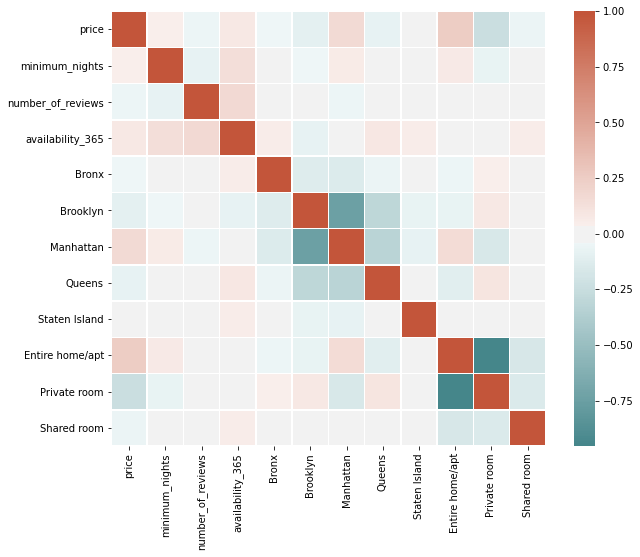

In [125]:
# Draw correlation matrix - version 1

fig, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, center=0, linewidths=0.5)

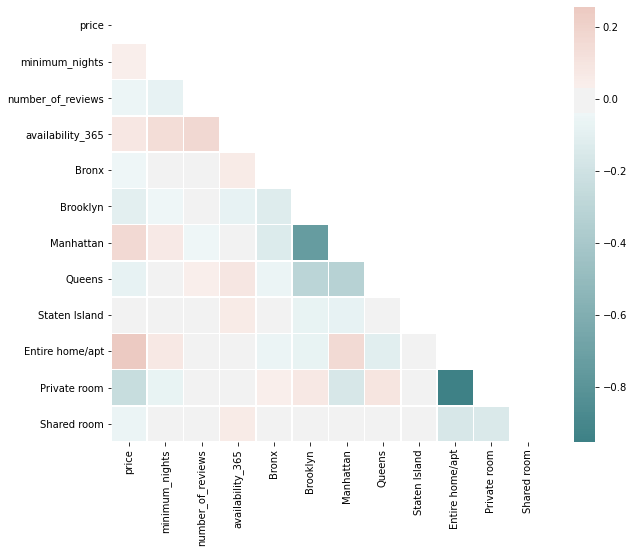

In [126]:
# Draw correlation matrix - version 2

fig, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=cmap, square=True, center=0, linewidths=0.5, mask=mask)

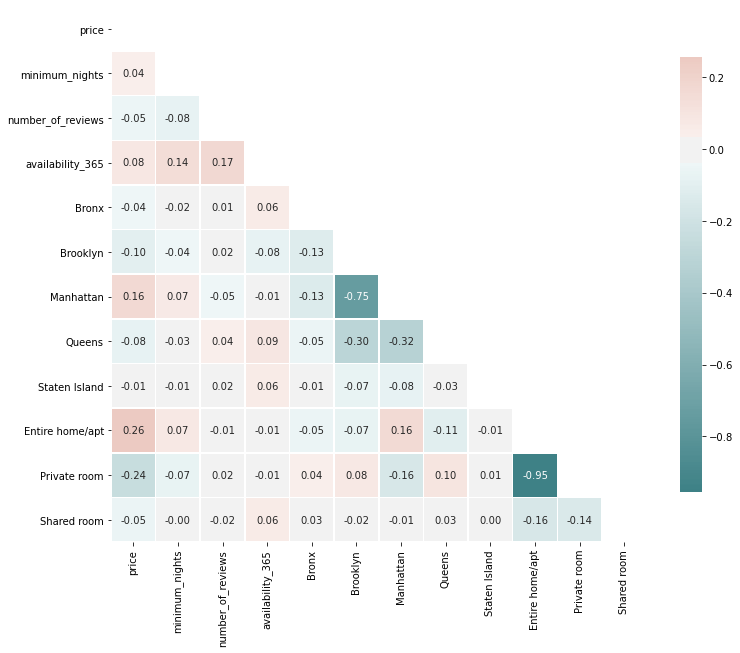

In [139]:
# Draw correlation matrix - version 3

fig, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=cmap, square=True, center=0, linewidths=0.5, mask=mask, annot=True, fmt=".2f", 
            cbar_kws={'shrink':.8}) #, vmin=0, vmax=1)